In [ ]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter

sn.set()

from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\Krishna Vamsi\anaconda3\envs\tensorenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Krishna Vamsi\anaconda3\envs\tensorenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Krishna Vamsi\anaconda3\envs\tensorenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Krishna Vamsi\anaconda3\envs

In [ ]:
def loadImages(path):
    sample = []
    
    for filename in glob.glob(path):
        
        img = cv2.imread(filename)
        img = skimage.transform.resize(img, (224, 224, 3))
        IMG = np.array(img)
        sample.append(IMG)
        
    return sample

In [ ]:
train_path1 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/train/NonDemented/*.jpg' 
train_path2 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/train/VeryMildDemented/*.jpg'
train_path3 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/train/MildDemented/*.jpg'
train_path4 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/train/ModerateDemented/*.jpg'

test_path1 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/test/NonDemented/*.jpg' 
test_path2 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/test/VeryMildDemented/*.jpg'
test_path3 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/test/MildDemented/*.jpg'
test_path4 = 'C:/Users/Krishna Vamsi/Desktop/Work/All Labs/Deep Learning/ct/Alzheimer_s Dataset/test/ModerateDemented/*.jpg'

In [ ]:
train_ND = loadImages(train_path1)
train_VMD = loadImages(train_path2)
train_MID = loadImages(train_path3)
train_MOD = loadImages(train_path4)

test_ND = loadImages(test_path1)
test_VMD = loadImages(test_path2)
test_MID = loadImages(test_path3)
test_MOD = loadImages(test_path4)

In [ ]:
df_train_ND = pd.DataFrame({'image':train_ND, 'label': 'ND'})
df_train_VMD = pd.DataFrame({'image':train_VMD, 'label': 'VMD'})
df_train_MID = pd.DataFrame({'image':train_MID, 'label': 'MID'})
df_train_MOD = pd.DataFrame({'image':train_MOD, 'label': 'MOD'})

df_test_ND = pd.DataFrame({'image':test_ND, 'label': 'ND'})
df_test_VMD = pd.DataFrame({'image':test_VMD, 'label': 'VMD'})
df_test_MID = pd.DataFrame({'image':test_MID, 'label': 'MID'})
df_test_MOD = pd.DataFrame({'image':test_MOD, 'label': 'MOD'})

In [ ]:
final_data = [df_train_ND, df_train_VMD, df_train_MID, df_train_MOD, df_test_ND, df_test_VMD, df_test_MID, df_test_MOD]
final_data = pd.concat(final_data)

In [ ]:
print("Entire data size:",final_data.shape)

Entire data size: (6400, 2)


In [ ]:
train_data = final_data['image']
labels = final_data['label']

In [ ]:
print("Labels Count:",Counter(np.array(labels)))

Labels Count: Counter({'ND': 3200, 'VMD': 2240, 'MID': 896, 'MOD': 64})


In [ ]:
onehot = LabelBinarizer()
labels = onehot.fit_transform(labels)
print(labels)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels,
                                                  test_size = 0.2,
                                                  stratify = labels,
                                                  shuffle = True,
                                                  random_state = 42)

In [ ]:
print('length X_train:', len(X_train))
print('length y_train:', len(y_train))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

length X_train: 5120
length y_train: 5120
length X_test: 1280
length y_test: 1280


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
x_train= np.empty((len(X_train),X_train[0].shape[0],X_train[0].shape[1],X_train[0].shape[2]))
for i,x in enumerate(X_train):
    x_train[i]=X_train[i]
print(x_train.shape)

(5120, 224, 224, 3)


In [ ]:
x_test= np.empty((len(X_test),X_test[0].shape[0],X_test[0].shape[1],X_test[0].shape[2]))
for i,x in enumerate(X_test):
    x_test[i]=X_test[i]
print(x_test.shape)

(1280, 224, 224, 3)


In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
from sklearn.utils import compute_class_weight

y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))
print(d_class_weights)

{0: 1.7852161785216178, 1: 25.098039215686274, 2: 0.5, 3: 0.7142857142857143}


C:\Users\Krishna Vamsi\anaconda3\envs\tensorenv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3], y=[3 2 0 ... 2 2 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
def build_model():
    
    '''Sequential Model creation'''
    model = Sequential()
    model.add(Conv2D(16,(3,3),padding='same',input_shape = x_train[0].shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))

    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Flatten())
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    return model

model = build_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
____

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,
                   restore_best_weights=True, verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc',tensorflow.keras.metrics.AUC(name = 'auc')])

In [ ]:
history = model.fit(x_train, y_train, epochs=20,batch_size=16, validation_split=0.2,callbacks=[es],class_weight = d_class_weights)

Train on 4096 samples, validate on 1024 samples
Epoch 1/20
4096/4096 [==============================] - 129s 31ms/sample - loss: 1.5300 - acc: 0.2695 - auc: 0.5471 - val_loss: 1.2694 - val_acc: 0.1924 - val_auc: 0.5634
Epoch 2/20
4096/4096 [==============================] - 110s 27ms/sample - loss: 1.2058 - acc: 0.4338 - auc: 0.7122 - val_loss: 0.7381 - val_acc: 0.6748 - val_auc: 0.8817
Epoch 3/20
4096/4096 [==============================] - 109s 27ms/sample - loss: 0.5951 - acc: 0.6953 - auc: 0.9057 - val_loss: 0.4063 - val_acc: 0.8027 - val_auc: 0.9584
Epoch 4/20
4096/4096 [==============================] - 112s 27ms/sample - loss: 0.2514 - acc: 0.8792 - auc: 0.9807 - val_loss: 0.2513 - val_acc: 0.8896 - val_auc: 0.9836
Epoch 5/20
4096/4096 [==============================] - 107s 26ms/sample - loss: 0.1065 - acc: 0.9534 - auc: 0.9963 - val_loss: 0.2850 - val_acc: 0.9033 - val_auc: 0.9852
Epoch 6/20
4096/4096 [==============================] - 132s 32ms/sample - loss: 0.0495 - acc: 0.

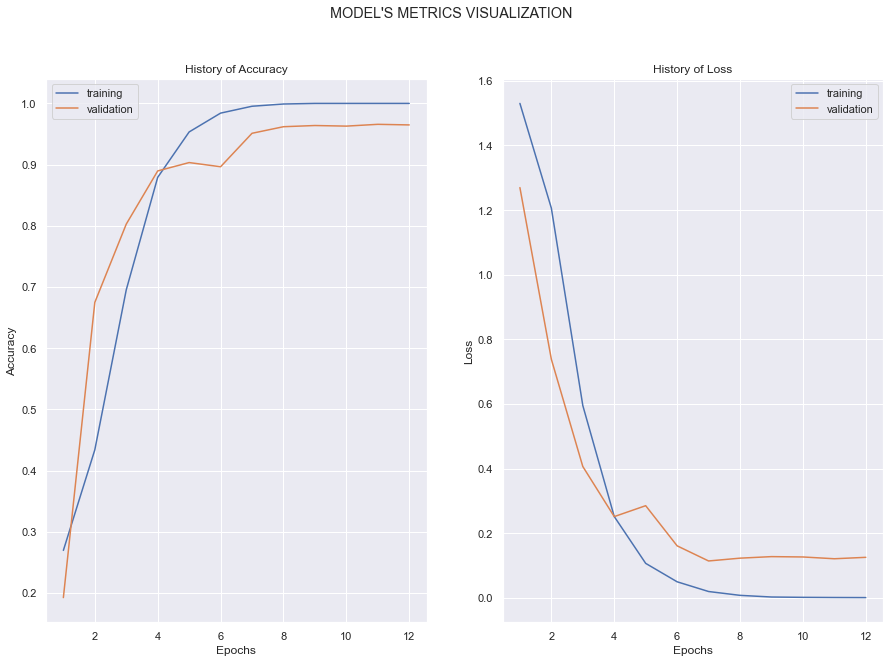

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(history.history['acc'],history.history['val_acc'],
               history.history['loss'],history.history['val_loss'])